In [231]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from pathlib import Path
import pandas as pd
import scipy.stats
import seaborn as sns
import scipy.stats as st

In [202]:
# Reading returns from cvs historic prices cvs and turning them into data frames 

apple_csv = Path("IEOR_E4150_Data/AAPL.csv")
google_csv = Path("IEOR_E4150_Data/GOOG.csv")
microsoft_csv = Path("IEOR_E4150_Data/MSFT.csv")
dell_csv = Path("IEOR_E4150_Data/DELL.csv")
toyota_csv = Path("IEOR_E4150_Data/TM.csv")
daimler_csv = Path("IEOR_E4150_Data/DMLRY.csv")
gm_csv = Path("IEOR_E4150_Data/GM.csv")
ford_csv = Path("IEOR_E4150_Data/F.csv")
tesla_csv = Path("IEOR_E4150_Data/TSLA.csv")
nasdaq_csv = Path("IEOR_E4150_Data/^IXIC.csv")


aux_df = pd.read_csv(apple_csv, index_col="Open", infer_datetime_format=True, parse_dates=True)
date_list = list(aux_df['Date']) 

apple_price_df = pd.read_csv(apple_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
google_price_df = pd.read_csv(google_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
microsoft_price_df = pd.read_csv(microsoft_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
dell_price_df = pd.read_csv(dell_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
toyota_price_df = pd.read_csv(toyota_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
daimler_price_df = pd.read_csv(daimler_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
gm_price_df = pd.read_csv(gm_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
ford_price_df = pd.read_csv(ford_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
tesla_price_df = pd.read_csv(tesla_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
nasdaq_price_df = pd.read_csv(nasdaq_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Selecting from the dataframe just the "close" column

apple_price_df = apple_price_df[['Open','Close']]
google_price_df = google_price_df[['Open','Close']]
microsoft_price_df = microsoft_price_df[['Open','Close']]
dell_price_df = dell_price_df[['Open','Close']]
toyota_price_df = toyota_price_df[['Open','Close']]
daimler_price_df = daimler_price_df[['Open','Close']]
gm_price_df = gm_price_df[['Open','Close']]
ford_price_df = ford_price_df[['Open','Close']]
tesla_price_df = tesla_price_df[['Open','Close']]
nasdaq_price_df = nasdaq_price_df[['Open','Close']]

In [389]:
# Compute the log-returns

apple_price_df["apple_log_returns"] = np.log(apple_price_df["Close"] / apple_price_df["Open"])
google_price_df["google_log_returns"] = np.log(google_price_df["Close"] / google_price_df["Open"])
microsoft_price_df["microsoft_log_returns"] = np.log(microsoft_price_df["Close"] / microsoft_price_df["Open"])
dell_price_df["dell_log_returns"] = np.log(dell_price_df["Close"] / dell_price_df["Open"])
toyota_price_df["toyota_log_returns"] = np.log(toyota_price_df["Close"] / toyota_price_df["Open"])
daimler_price_df["daimler_log_returns"] = np.log(daimler_price_df["Close"] / daimler_price_df["Open"])
gm_price_df["gm_log_returns"] = np.log(gm_price_df["Close"] / gm_price_df["Open"])
ford_price_df["ford_log_returns"] = np.log(ford_price_df["Close"] / ford_price_df["Open"])
tesla_price_df["tesla_log_returns"] = np.log(tesla_price_df["Close"] / tesla_price_df["Open"])
nasdaq_price_df["nasdaq_log_returns"] = np.log(nasdaq_price_df["Close"] / nasdaq_price_df["Open"])

# Drop "Open" and "Close" columns

apple_log_returns_df = apple_price_df[["apple_log_returns"]]
google_log_returns_df = google_price_df[["google_log_returns"]]
microsoft_log_returns_df = microsoft_price_df[["microsoft_log_returns"]]
dell_log_returns_df = dell_price_df[["dell_log_returns"]]
toyota_log_returns_df = toyota_price_df[["toyota_log_returns"]]
daimler_log_returns_df = daimler_price_df[["daimler_log_returns"]]
gm_log_returns_df = gm_price_df[["gm_log_returns"]]
ford_log_returns_df = ford_price_df[["ford_log_returns"]]
tesla_log_returns_df = tesla_price_df[["tesla_log_returns"]]
nasdaq_log_returns_df = nasdaq_price_df[["nasdaq_log_returns"]]

# concatenate dataframes 

log_returns_df = pd.concat([apple_log_returns_df, google_log_returns_df, microsoft_log_returns_df, dell_log_returns_df, toyota_log_returns_df, daimler_log_returns_df, gm_log_returns_df, ford_log_returns_df, tesla_log_returns_df,nasdaq_log_returns_df], axis=1, join='inner')

In [390]:
log_returns_df

,apple_log_returns,google_log_returns,microsoft_log_returns,dell_log_returns,toyota_log_returns,daimler_log_returns,gm_log_returns,ford_log_returns,tesla_log_returns,nasdaq_log_returns
Date,,,,,,,,,,
2018-11-27,0.015792,0.003270,0.008153,-0.006096,-0.007246,-0.020805,-0.015685,-0.009652,0.011316,0.005872
2018-11-28,0.023542,0.035104,0.029499,0.011700,0.008010,0.013879,0.005155,0.014990,0.005419,0.021698
2018-11-29,-0.017173,0.011292,-0.001270,0.003686,0.002137,-0.009062,-0.000816,0.000000,-0.016944,0.000785
2018-11-30,-0.009530,0.004910,0.001715,-0.014308,0.005613,0.018585,0.032403,0.004260,0.024990,0.007015
2018-12-03,0.001950,-0.014990,-0.008086,-0.007646,0.002026,-0.007470,-0.014203,-0.011393,-0.004203,-0.005978
...,...,...,...,...,...,...,...,...,...,...
2020-11-19,0.008890,0.014585,0.004908,0.015299,0.001562,-0.001832,0.004916,-0.006780,0.014668,0.010612
2020-11-20,-0.011018,-0.013127,-0.008566,-0.005108,-0.001195,0.000610,0.005358,-0.007977,-0.016971,-0.003178
2020-11-23,-0.028829,-0.008460,-0.003990,0.011306,-0.003415,-0.008403,0.018258,0.004525,0.035796,-0.003036


In [392]:
def getlist(column_name):
    lista = log_returns_df[column_name].tolist()
    return lista

log_returns_df['day'] = np.arange(log_returns_df.shape[0])
days_list = getlist('day')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11efbc668>]],
      dtype=object)

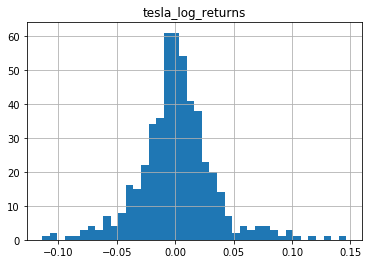

In [15]:
# Histograms for each stock

log_returns_df.hist(column="tesla_log_returns",bins=40)

# COMPLETE

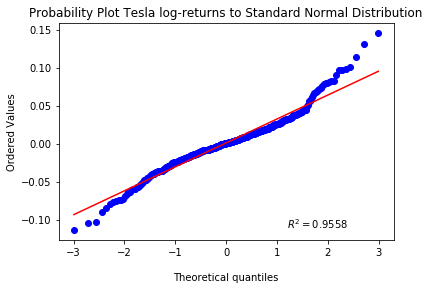

In [378]:
# Normal probability plots

stats.probplot(log_returns_df['tesla_log_returns'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\n", labelpad=15)
plt.title("Probability Plot Tesla log-returns to Standard Normal Distribution")
plt.show()

# COMPLETE

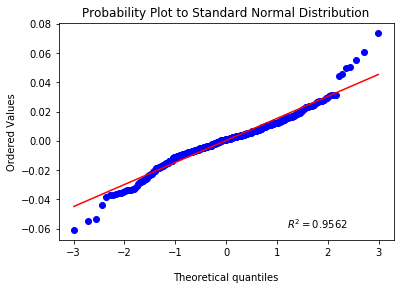

In [382]:
stats.probplot(log_returns_df['microsoft_log_returns'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\n", labelpad=15)
plt.title("Probability Plot to Standard Normal Distribution")
plt.show()

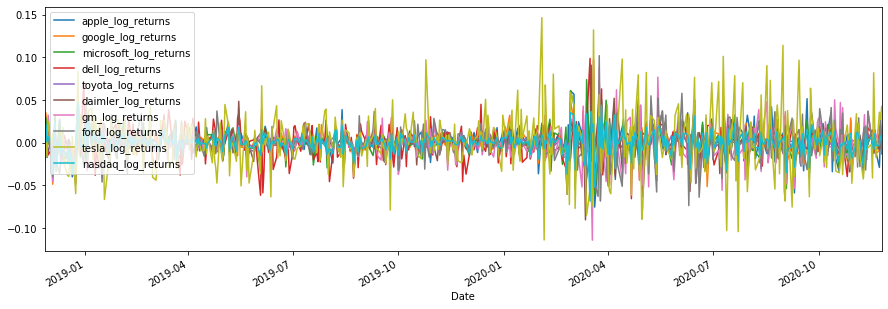

In [386]:
log_returns_df.plot(figsize=(15,5))

In [205]:
var_df = log_returns_df.var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)
var_array = var_df.values
var_array

array([2.69249548e-04, 2.05162359e-04, 2.34951444e-04, 3.59305273e-04,
       4.91301367e-05, 2.15304585e-04, 3.91104763e-04, 3.78258482e-04,
       1.03026720e-03, 1.41233325e-04])

In [206]:
mean_df = log_returns_df.mean(axis=None, skipna=None, level=None, numeric_only=None)
mean_array = mean_df.values
mean_array

array([ 1.29403027e-03,  1.16050714e-03,  3.35009644e-04, -3.66837067e-06,
       -3.50755079e-04,  1.65020732e-04, -8.99726428e-04, -1.63659372e-03,
        1.25753989e-03,  4.62015285e-04])

In [207]:
log_returns_df.count(axis=0, level=None, numeric_only=False)

apple_log_returns        504
google_log_returns       504
microsoft_log_returns    504
dell_log_returns         504
toyota_log_returns       504
daimler_log_returns      504
gm_log_returns           504
ford_log_returns         504
tesla_log_returns        504
nasdaq_log_returns       504
dtype: int64

In [ ]:
# APRROXIMATE CONFIDENCE INTERVALS FOR THE MEANS

st.norm.ppf(1 - alpha/2)

In [208]:
def mean_confidence_interval(company, confidence):
    confidence = confidence/100
    company_log_retruns_list = company.tolist()
    a = 1.0 * np.array(company_log_retruns_list)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    interval_low = m-h
    interval_high = m+h
    return interval_low, interval_high

In [209]:
tesla_low_mean , tesla_high_mean = mean_confidence_interval(log_returns_df['tesla_log_returns'], 95)
apple_low_mean , apple_high_mean = mean_confidence_interval(log_returns_df['apple_log_returns'], 95)
google_low_mean , google_high_mean = mean_confidence_interval(log_returns_df['google_log_returns'], 95)
microsoft_low_mean , microsoft_high_mean = mean_confidence_interval(log_returns_df['microsoft_log_returns'], 95)
dell_low_mean , dell_high_mean = mean_confidence_interval(log_returns_df['dell_log_returns'], 95)
toyota_low_mean , toyota_high_mean = mean_confidence_interval(log_returns_df['toyota_log_returns'], 95)
daimler_low_mean , daimler_high_mean = mean_confidence_interval(log_returns_df['daimler_log_returns'], 95)
gm_low_mean , gm_high_mean = mean_confidence_interval(log_returns_df['gm_log_returns'], 95)
ford_low_mean , ford_high_mean = mean_confidence_interval(log_returns_df['ford_log_returns'], 95)
nasdaq_low_mean , nasdaq_high_mean = mean_confidence_interval(log_returns_df['nasdaq_log_returns'], 95)

In [210]:
mean_confidence_interval = {'Stock/Index': ['Tesla','Apple','Google','Microsoft','Dell','Toyota','Daimler','GM','Ford','Nasdaq'], 'lower_bound_mean': [tesla_low_mean,apple_low_mean,google_low_mean,microsoft_low_mean,dell_low_mean,toyota_low_mean,daimler_low_mean,gm_low_mean,ford_low_mean,nasdaq_low_mean],'upper_bound_mean': [tesla_high_mean,apple_high_mean,google_high_mean,microsoft_high_mean,dell_high_mean,toyota_high_mean,daimler_high_mean,gm_high_mean,ford_high_mean,nasdaq_high_mean]}
mean_confidence_interval_df = pd.DataFrame(data=mean_confidence_interval)

In [211]:
mean_confidence_interval_df

,Stock/Index,lower_bound_mean,upper_bound_mean
0,Tesla,-0.001551,0.004067
1,Apple,-0.000142,0.002730
2,Google,-0.000093,0.002414
3,Microsoft,-0.001006,0.001676
4,Dell,-0.001663,0.001655
5,Toyota,-0.000964,0.000263
6,Daimler,-0.001119,0.001449
7,GM,-0.002630,0.000831
8,Ford,-0.003339,0.000065
9,Nasdaq,-0.000578,0.001502


In [212]:
# APRROXIMATE CONFIDENCE INTERVALS FOR THE VARIANCES

import statistics 
def variance_confidence_interval(company, confidence):
    company_log_retruns_list = company.tolist()
    alpha = 1-(confidence/100)
    a = 1.0 * np.array(company_log_retruns_list)
    n = len(a)
    var2 = statistics.variance(a)
    lower_point = alpha/2
    upper_point = 1-(alpha/2)
    lower_chi2 = stats.chi2.ppf(upper_point, n-1)
    upper_chi2 = stats.chi2.ppf(lower_point, n-1)
    interval_low = ((n-1)*var2)/lower_chi2
    interval_high = ((n-1)*var2)/upper_chi2
    return interval_low,interval_high

In [213]:

tesla_low_var,tesla_high_var=variance_confidence_interval(log_returns_df['tesla_log_returns'], 95)
apple_low_var,apple_high_var=variance_confidence_interval(log_returns_df['apple_log_returns'], 95)
google_low_var,google_high_var=variance_confidence_interval(log_returns_df['google_log_returns'], 95)
microsoft_low_var,microsoft_high_var=variance_confidence_interval(log_returns_df['microsoft_log_returns'], 95)
dell_low_var,dell_high_var=variance_confidence_interval(log_returns_df['dell_log_returns'], 95)
toyota_low_var,toyota_high_var=variance_confidence_interval(log_returns_df['toyota_log_returns'], 95)
daimler_low_var,daimler_high_var=variance_confidence_interval(log_returns_df['daimler_log_returns'], 95)
gm_low_var,gm_high_var=variance_confidence_interval(log_returns_df['gm_log_returns'], 95)
ford_low_var,ford_high_var=variance_confidence_interval(log_returns_df['ford_log_returns'], 95)
nasdaq_low_var,nasdaq_high_var=variance_confidence_interval(log_returns_df['nasdaq_log_returns'], 95)

In [214]:
variance_confidence_intervals = {'Stock/Index': ['Tesla','Apple','Google','Microsoft','Dell','Toyota','Daimler','GM','Ford','Nasdaq'], 'lower_bound_var': [tesla_low_var,apple_low_var,google_low_var,microsoft_low_var,dell_low_var,toyota_low_var,daimler_low_var,gm_low_var,ford_low_var,nasdaq_low_var],'upper_bound_variance': [tesla_high_var,apple_high_var,google_high_var,microsoft_high_var,dell_high_var,toyota_high_var,daimler_high_var,gm_high_var,ford_high_var,nasdaq_high_var]}
variance_confidence_intervals_df = pd.DataFrame(data=variance_confidence_intervals)

In [215]:
variance_confidence_intervals_df

,Stock/Index,lower_bound_var,upper_bound_variance
0,Tesla,0.000914,0.001170
1,Apple,0.000239,0.000306
2,Google,0.000182,0.000233
3,Microsoft,0.000208,0.000267
4,Dell,0.000319,0.000408
5,Toyota,0.000044,0.000056
6,Daimler,0.000191,0.000245
7,GM,0.000347,0.000444
8,Ford,0.000336,0.000430
9,Nasdaq,0.000125,0.000160


In [163]:
# Regression of the log returns on time

def linear_regression_stock_ontime(x ,y):
    x = log_returns_df[x].to_frame()
    y = log_returns_df[y].to_frame()
    x = 1.0 * np.array(x)
    y = 1.0 * np.array(y)
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    r2 = model.score(x, y, sample_weight=None)
    intercept = model.intercept_
    coef = model.coef_
    return r2, intercept, coef

In [ ]:
log_returns_df['day'] = np.arange(log_returns_df.shape[0])

In [393]:


days_list = log_returns_df['day'].tolist()

tesla_time_r2, tesla_time_intercept, tesla_time_coef, tesla_time_predictions = linear_regression_stock_ontime('day','tesla_log_returns')
apple_time_r2, apple_time_intercept, apple_time_coef, apple_time_predictions = linear_regression_stock_ontime('day','apple_log_returns')
google_time_r2, google_time_intercept, google_time_coef, google_time_predictions = linear_regression_stock_ontime('day','google_log_returns')
microsoft_time_r2, microsoft_time_intercept, microsoft_time_coef, microsoft_time_predictions = linear_regression_stock_ontime('day','microsoft_log_returns')
dell_time_r2, dell_time_intercept, dell_time_coef, dell_time_predictions = linear_regression_stock_ontime('day','dell_log_returns')
toyota_time_r2, toyota_time_intercept, toyota_time_coef, toyota_time_predictions = linear_regression_stock_ontime('day','toyota_log_returns')
daimler_time_r2, daimler_time_intercept, daimler_time_coef, daimler_time_predictions = linear_regression_stock_ontime('day','daimler_log_returns')
gm_time_r2, gm_time_intercept, gm_time_coef, gm_time_predictions = linear_regression_stock_ontime('day','gm_log_returns')
ford_time_r2, ford_time_intercept, ford_time_coef, ford_time_predictions = linear_regression_stock_ontime('day','ford_log_returns')
nasdaq_time_r2, nasdaq_time_intercept, nasdaq_time_coef, nasdaq_time_predictions = linear_regression_stock_ontime('day','nasdaq_log_returns')

tesla_time_predictions_df = pd.DataFrame(tesla_time_predictions, columns = ['tesla_predictions_time'])

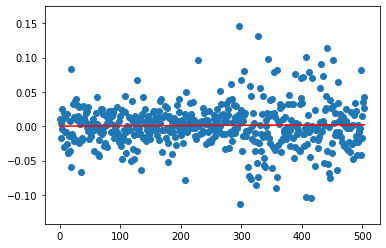

In [394]:
plt.scatter(log_returns_df['day'], log_returns_df['tesla_log_returns'])
plt.plot(log_returns_df['day'], tesla_time_predictions, color='red')
plt.show()

In [402]:
tesla_time_intercept[0]

0.0002643720136042667

In [407]:
# Dataframe for linear regression results over time

regression_on_time = {'Security': ['tesla', 'apple', 'google', 'microsoft', 'dell', 'toyota', 'daimler', 'gm','ford','nasdaq'],
                             'Slope': [tesla_time_coef[0][0], apple_time_coef[0][0], google_time_coef[0][0], microsoft_time_coef[0][0], dell_time_coef[0][0], toyota_time_coef[0][0], daimler_time_coef[0][0], gm_time_coef[0][0],ford_time_coef[0][0],nasdaq_time_coef[0][0]],
                             'Intersect': [tesla_time_intercept[0], apple_time_intercept[0], google_time_intercept[0], microsoft_time_intercept[0], dell_time_intercept[0], 
                                           toyota_time_intercept[0], daimler_time_intercept[0], gm_time_intercept[0],ford_time_intercept[0],nasdaq_time_intercept[0]],
                     'R2':[tesla_time_r2, apple_time_r2, google_time_r2, microsoft_time_r2, dell_time_r2, toyota_time_r2, daimler_time_r2, gm_time_r2,ford_time_r2,nasdaq_time_r2]}
regression_on_time_df = pd.DataFrame(data=regression_on_time)
                             

In [408]:
regression_on_time_df

,Security,Slope,Intersect,R2
0,tesla,3.948978e-06,0.000264,0.000321
1,apple,-1.736038e-06,0.001731,0.000237
2,google,3.123893e-07,0.001082,0.000010
3,microsoft,-2.833498e-07,0.000406,0.000007
4,dell,-8.232416e-07,0.000203,0.000040
5,toyota,-2.324537e-06,0.000234,0.002333
6,daimler,1.125751e-06,-0.000118,0.000125
7,gm,1.819917e-06,-0.001357,0.000180
8,ford,-1.972770e-06,-0.001140,0.000218
9,nasdaq,-4.368710e-07,0.000572,0.000029


In [219]:
#linear regression tesla against the other companies

def simple_linear_regression(x,y):
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    r2 = model.score(x, y, sample_weight=None)
    intercept = model.intercept_
    coef = model.coef_
    return r2, intercept, coef, predictions

In [220]:
tesla_apple_r2, tesla_apple_intercept, tesla_apple_coef, tesla_apple_predictions = simple_linear_regression(apple_log_returns_df,tesla_log_returns_df)
tesla_google_r2, tesla_google_intercept, tesla_google_coef, tesla_google_predictions = simple_linear_regression(google_log_returns_df,tesla_log_returns_df)
tesla_microsoft_r2, tesla_microsoft_intercept, tesla_microsoft_coef, tesla_microsoft_predictions = simple_linear_regression(microsoft_log_returns_df,tesla_log_returns_df)
tesla_dell_r2, tesla_dell_intercept, tesla_dell_coef, tesla_dell_predictions = simple_linear_regression(dell_log_returns_df,tesla_log_returns_df)
tesla_toyota_r2, tesla_toyota_intercept, tesla_toyota_coef, tesla_toyota_predictions = simple_linear_regression(toyota_log_returns_df,tesla_log_returns_df)
tesla_daimler_r2, tesla_daimler_intercept, tesla_daimler_coef, tesla_daimler_predictions = simple_linear_regression(daimler_log_returns_df,tesla_log_returns_df)
tesla_gm_r2, tesla_gm_intercept, tesla_gm_coef, tesla_gm_predictions = simple_linear_regression(gm_log_returns_df,tesla_log_returns_df)
tesla_ford_r2, tesla_ford_intercept, tesla_ford_coef, tesla_ford_predictions = simple_linear_regression(ford_log_returns_df,tesla_log_returns_df)
tesla_nasdaq_r2, tesla_nasdaq_intercept, tesla_nasdaq_coef, tesla_nasdaq_predictions = simple_linear_regression(nasdaq_log_returns_df,tesla_log_returns_df)

In [221]:
regression_tesla_vs_others = {'Stock/Index': ['Apple','Google','Microsoft','Dell','Toyota','Daimler','GM','Ford','Nasdaq'], 'Slope': [tesla_apple_coef,tesla_google_coef,tesla_microsoft_coef,tesla_dell_coef,tesla_toyota_coef,tesla_daimler_coef,tesla_gm_coef,tesla_ford_coef,tesla_nasdaq_coef],'Intercept': [tesla_apple_intercept,tesla_google_intercept,tesla_microsoft_intercept,tesla_dell_intercept,tesla_toyota_intercept,tesla_daimler_intercept,tesla_gm_intercept,tesla_ford_intercept,tesla_nasdaq_intercept],'R2':[tesla_apple_r2,tesla_google_r2,tesla_microsoft_r2,tesla_dell_r2,tesla_toyota_r2,tesla_daimler_r2,tesla_gm_r2,tesla_ford_r2,tesla_nasdaq_r2]}
regression_tesla_vs_others_df = pd.DataFrame(data=regression_tesla_vs_others)

In [222]:
regression_tesla_vs_others_df

,Stock/Index,Slope,Intercept,R2
0,Apple,[[0.6726761257944232]],[0.0003870766239460632],0.118254
1,Google,[[0.7416420070256993]],[0.00039685904173164673],0.109531
2,Microsoft,[[0.7475108605464611]],[0.0010071165420504674],0.127428
3,Dell,[[0.3963400244516198]],[0.0012589938115520245],0.054783
4,Toyota,[[1.19473211362533]],[0.0016765982459067538],0.068067
5,Daimler,[[0.591940614945984]],[0.0011598574158541565],0.073225
6,GM,[[0.4364128850188832]],[0.0016501920953938807],0.072300
7,Ford,[[0.38875176555966007]],[0.0018937685863365914],0.055486
8,Nasdaq,[[1.1763207206845023]],[0.0007140617366865825],0.189688


In [244]:
# Test equality two population means

def statistic_two_means_equality(samp_mean_1,samp_mean_2,samp_var_1,samp_var_2,n,m):
    stat = (samp_mean_1-samp_mean_2)/((samp_var_1)/n + (samp_var_2)/m)**0.5
    return stat

def upper_lower_bounds_norm_ppf(alpha):
    upper = st.norm.ppf(1 - alpha/2)
    lower = st.norm.ppf(alpha/2)
    return lower, upper

In [249]:
# Tesla agains all the other stocks (Not paired test)

lower, upper = upper_lower_bounds_norm_ppf(0.05)
tesla_apple_stat = statistic_two_means_equality(mean_array[8],mean_array[0],var_array[8],var_array[0],504,504)
tesla_google_stat = statistic_two_means_equality(mean_array[8],mean_array[1],var_array[8],var_array[1],504,504)
tesla_microsoft_stat = statistic_two_means_equality(mean_array[8],mean_array[2],var_array[8],var_array[2],504,504)
tesla_dell_stat = statistic_two_means_equality(mean_array[8],mean_array[3],var_array[8],var_array[3],504,504)
tesla_toyota_stat = statistic_two_means_equality(mean_array[8],mean_array[4],var_array[8],var_array[4],504,504)
tesla_daimler_stat = statistic_two_means_equality(mean_array[8],mean_array[5],var_array[8],var_array[5],504,504)
tesla_gm_stat = statistic_two_means_equality(mean_array[8],mean_array[6],var_array[8],var_array[6],504,504)
tesla_ford_stat = statistic_two_means_equality(mean_array[8],mean_array[7],var_array[8],var_array[7],504,504)
tesla_nasdaq_stat = statistic_two_means_equality(mean_array[8],mean_array[9],var_array[8],var_array[9],504,504)

means_equality_hyphotesis = {'-Z': [lower, lower, lower, lower, lower, lower, lower, lower,lower], 'statistic': [tesla_apple_stat,tesla_google_stat,tesla_microsoft_stat,tesla_dell_stat,tesla_toyota_stat,tesla_daimler_stat,tesla_gm_stat,tesla_ford_stat,tesla_nasdaq_stat],'Z': [upper, upper,upper, upper, upper, upper, upper,upper,upper]}
means_equality_hyphotesis_df = pd.DataFrame(data=means_equality_hyphotesis)

In [250]:
means_equality_hyphotesis_df

,-Z,statistic,Z
0,-1.959964,-0.022725,1.959964
1,-1.959964,0.061976,1.959964
2,-1.959964,0.582255,1.959964
3,-1.959964,0.759559,1.959964
4,-1.959964,1.098981,1.959964
5,-1.959964,0.694960,1.959964
6,-1.959964,1.284592,1.959964
7,-1.959964,1.731217,1.959964
8,-1.959964,0.521792,1.959964


In [409]:
#Function to compute the p value of the statistic for the equality of means (not paired test)

def p_values_means_not_paired(statistic):
    n = len(log_returns_df)
    statistic = abs(statistic)
    right_tail_prob = 1 - scipy.stats.norm.cdf(statistic)
    p_val = 2 * right_tail_prob
    return p_val


In [418]:
# P values computation

p_val_tesla_apple_stat = p_values_means_not_paired(tesla_apple_stat)
p_val_tesla_google_stat = p_values_means_not_paired(tesla_google_stat)
p_val_tesla_microsoft_stat = p_values_means_not_paired(tesla_microsoft_stat)
p_val_tesla_dell_stat = p_values_means_not_paired(tesla_dell_stat)
p_val_tesla_toyota_stat = p_values_means_not_paired(tesla_toyota_stat)
p_val_tesla_daimler_stat = p_values_means_not_paired(tesla_daimler_stat)
p_val_tesla_gm_stat = p_values_means_not_paired(tesla_gm_stat)
p_val_tesla_ford_stat = p_values_means_not_paired(tesla_ford_stat)
p_val_tesla_nasdaq_stat = p_values_means_not_paired(tesla_nasdaq_stat)

In [419]:
p_val_tesla_others_mean_notpaired = {'Pair Of Companies': ['tesla_apple','tesla_google',' tesla_microsoft','tesla_dell','tesla_toyota','tesla_daimler','tesla_gm','tesla_ford','tesla_nasdaq'],
    'p-val': [p_val_tesla_apple_stat, p_val_tesla_google_stat, p_val_tesla_microsoft_stat,p_val_tesla_dell_stat,p_val_tesla_toyota_stat,p_val_tesla_daimler_stat,p_val_tesla_gm_stat,p_val_tesla_ford_stat,p_val_tesla_nasdaq_stat]}
p_val_tesla_others_mean_notpaired_df = pd.DataFrame(data=p_val_tesla_others_mean_notpaired)

In [420]:
p_val_tesla_others_mean_notpaired_df

,Pair Of Companies,p-val
0,tesla_apple,0.981870
1,tesla_google,0.950582
2,tesla_microsoft,0.560395
3,tesla_dell,0.447518
4,tesla_toyota,0.271776
5,tesla_daimler,0.487080
6,tesla_gm,0.198935
7,tesla_ford,0.083413
8,tesla_nasdaq,0.601815


In [415]:
p_val_tesla_ford_stat

0.08341310342289088

In [254]:
# Tesla agains all the other stocks with paired t-test

# dataframe subtraction log-returns of two stocks to study with t-test (wi=xi-yi)

def difference_log_returns(company1,company2):
    diff = log_returns_df[company1] - log_returns_df[company2]
    return diff

In [259]:
# tesla minus all others

w_tesla_apple = difference_log_returns('tesla_log_returns','apple_log_returns')
w_tesla_google = difference_log_returns('tesla_log_returns','google_log_returns')
w_tesla_microsoft = difference_log_returns('tesla_log_returns','microsoft_log_returns')
w_tesla_dell = difference_log_returns('tesla_log_returns','dell_log_returns')
w_tesla_toyota = difference_log_returns('tesla_log_returns','toyota_log_returns')
w_tesla_daimler = difference_log_returns('tesla_log_returns','daimler_log_returns')
w_tesla_gm = difference_log_returns('tesla_log_returns','gm_log_returns')
w_tesla_ford = difference_log_returns('tesla_log_returns','ford_log_returns')
w_tesla_nasdaq = difference_log_returns('tesla_log_returns','nasdaq_log_returns')

# nasdaq minus all others

w_nasdaq_apple = difference_log_returns('nasdaq_log_returns','apple_log_returns')
w_nasdaq_google = difference_log_returns('nasdaq_log_returns','google_log_returns')
w_nasdaq_microsoft = difference_log_returns('nasdaq_log_returns','microsoft_log_returns')
w_nasdaq_dell = difference_log_returns('nasdaq_log_returns','dell_log_returns')
w_nasdaq_toyota = difference_log_returns('nasdaq_log_returns','toyota_log_returns')
w_nasdaq_daimler = difference_log_returns('nasdaq_log_returns','daimler_log_returns')
w_nasdaq_gm = difference_log_returns('nasdaq_log_returns','gm_log_returns')
w_nasdaq_ford = difference_log_returns('nasdaq_log_returns','ford_log_returns')

# w mean

w_mean_tesla_apple = w_tesla_apple.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_tesla_google = w_tesla_google.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_tesla_microsoft = w_tesla_microsoft.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_tesla_dell = w_tesla_dell.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_tesla_toyota = w_tesla_toyota.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_tesla_daimler = w_tesla_daimler.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_tesla_gm = w_tesla_gm.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_tesla_ford = w_tesla_ford.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_tesla_nasdaq = w_tesla_nasdaq.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_nasdaq_apple = w_nasdaq_apple.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_nasdaq_google = w_nasdaq_google.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_nasdaq_microsoft = w_nasdaq_microsoft.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_nasdaq_dell = w_nasdaq_dell.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_nasdaq_toyota = w_nasdaq_toyota.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_nasdaq_daimler = w_nasdaq_daimler.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_nasdaq_gm = w_nasdaq_gm.mean(axis=None, skipna=None, level=None, numeric_only=None)
w_mean_nasdaq_ford = w_nasdaq_ford.mean(axis=None, skipna=None, level=None, numeric_only=None)

# w standard deviation

w_std_tesla_apple = w_tesla_apple.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_tesla_google = w_tesla_google.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_tesla_microsoft = w_tesla_microsoft.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_tesla_dell = w_tesla_dell.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_tesla_toyota = w_tesla_toyota.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_tesla_daimler = w_tesla_daimler.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_tesla_gm = w_tesla_gm.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_tesla_ford = w_tesla_ford.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_tesla_nasdaq = w_tesla_nasdaq.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_nasdaq_apple = w_nasdaq_apple.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_nasdaq_google = w_nasdaq_google.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_nasdaq_microsoft = w_nasdaq_microsoft.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_nasdaq_dell = w_nasdaq_dell.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_nasdaq_toyota = w_nasdaq_toyota.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_nasdaq_daimler = w_nasdaq_daimler.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_nasdaq_gm = w_nasdaq_gm.std(axis=None, skipna=None, level=None, numeric_only=None)
w_std_nasdaq_ford = w_nasdaq_ford.std(axis=None, skipna=None, level=None, numeric_only=None)

In [286]:
# funtion to compute t-test statistic

def statistic_t_test(w_mean,w_std,n):
    t_stat = ((n**0.5)*w_mean)/w_std
    return t_stat

# Function to compute bounds of t_test confidence interval

def t_test_bounds(confidence,n):
    upper = scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    lower = -(upper)
    return lower, upper

In [291]:
# bounds of t_test confidence interval

t_test_lower_bound, t_test_upper_bound = t_test_bounds(0.95,len(log_returns_df))

# t-test statistics

t_test_stat_tesla_apple = statistic_t_test(w_mean_tesla_apple,w_std_tesla_apple,len(log_returns_df))
t_test_stat_tesla_google = statistic_t_test(w_mean_tesla_google,w_std_tesla_google,len(log_returns_df))
t_test_stat_tesla_microsoft = statistic_t_test(w_mean_tesla_microsoft,w_std_tesla_microsoft,len(log_returns_df))
t_test_stat_tesla_dell = statistic_t_test(w_mean_tesla_dell,w_std_tesla_dell,len(log_returns_df))
t_test_stat_tesla_toyota = statistic_t_test(w_mean_tesla_toyota,w_std_tesla_toyota,len(log_returns_df))
t_test_stat_tesla_daimler = statistic_t_test(w_mean_tesla_daimler,w_std_tesla_daimler,len(log_returns_df))
t_test_stat_tesla_gm = statistic_t_test(w_mean_tesla_gm,w_std_tesla_gm,len(log_returns_df))
t_test_stat_tesla_ford = statistic_t_test(w_mean_tesla_ford,w_std_tesla_ford,len(log_returns_df))
t_test_stat_tesla_nasdaq = statistic_t_test(w_mean_tesla_nasdaq,w_std_tesla_nasdaq,len(log_returns_df))
t_test_stat_nasdaq_apple = statistic_t_test(w_mean_nasdaq_apple,w_std_nasdaq_apple,len(log_returns_df))
t_test_stat_nasdaq_google = statistic_t_test(w_mean_nasdaq_google,w_std_nasdaq_google,len(log_returns_df))
t_test_stat_nasdaq_microsoft = statistic_t_test(w_mean_nasdaq_microsoft,w_std_nasdaq_microsoft,len(log_returns_df))
t_test_stat_nasdaq_dell = statistic_t_test(w_mean_nasdaq_dell,w_std_nasdaq_dell,len(log_returns_df))
t_test_stat_nasdaq_toyota = statistic_t_test(w_mean_nasdaq_toyota,w_std_nasdaq_toyota,len(log_returns_df))
t_test_stat_nasdaq_daimler = statistic_t_test(w_mean_nasdaq_daimler,w_std_nasdaq_daimler,len(log_returns_df))
t_test_stat_nasdaq_gm = statistic_t_test(w_mean_nasdaq_gm,w_std_nasdaq_gm,len(log_returns_df))
t_test_stat_nasdaq_ford = statistic_t_test(w_mean_nasdaq_ford,w_std_nasdaq_ford,len(log_returns_df))

In [ ]:
#  the p values of t-test

# In order to get the p value, first take the absulute value of the statistic to make sure we are reading for positive values, this program reads to the right, so we subtract from 1, and then we multiply by two to get both tails of probability

def p_values_t_test(statistic):
    n = len(log_returns_df)
    statistic = abs(statistic)
    right_tail_prob = 1 - scipy.stats.t.cdf(statistic, n-1)
    p_val = 2 * right_tail_prob
    return p_val



In [310]:
tesla_apple_pval = p_values_t_test(t_test_stat_tesla_apple)
tesla_google_pval = p_values_t_test(t_test_stat_tesla_google)
tesla_microsoft_pval = p_values_t_test(t_test_stat_tesla_microsoft)
tesla_dell_pval = p_values_t_test(t_test_stat_tesla_dell)
tesla_toyota_pval = p_values_t_test(t_test_stat_tesla_toyota)
tesla_daimler_pval = p_values_t_test(t_test_stat_tesla_daimler)
tesla_gm_pval = p_values_t_test(t_test_stat_tesla_gm)
tesla_ford_pval = p_values_t_test(t_test_stat_tesla_ford)
tesla_nasdaq_pval = p_values_t_test(t_test_stat_tesla_nasdaq)
nasdaq_apple_pval = p_values_t_test(t_test_stat_nasdaq_apple)
nasdaq_google_pval = p_values_t_test(t_test_stat_nasdaq_google)
nasdaq_microsoft_pval = p_values_t_test(t_test_stat_nasdaq_microsoft)
nasdaq_dell_pval = p_values_t_test(t_test_stat_nasdaq_dell)
nasdaq_toyota_pval = p_values_t_test(t_test_stat_nasdaq_toyota)
nasdaq_daimler_pval = p_values_t_test(t_test_stat_nasdaq_daimler)
nasdaq_gm_pval = p_values_t_test(t_test_stat_nasdaq_gm)
nasdaq_ford_pval = p_values_t_test(t_test_stat_nasdaq_ford)

In [315]:
# dataframe of t-test statistics

t_test_results_dic = {'comparing:': ['t_test_stat_tesla_apple','t_test_stat_tesla_google','t_test_stat_tesla_microsoft','t_test_stat_tesla_dell','t_test_stat_tesla_toyota','t_test_stat_tesla_daimler','t_test_stat_tesla_gm','t_test_stat_tesla_ford','t_test_stat_tesla_nasdaq',
                                         't_test_stat_nasdaq_apple','t_test_stat_nasdaq_google','t_test_stat_nasdaq_microsoft','t_test_stat_nasdaq_dell','t_test_stat_nasdaq_toyota','t_test_stat_nasdaq_daimler','t_test_stat_nasdaq_gm','t_test_stat_nasdaq_ford'],
                     'statistic_t_test': [t_test_stat_tesla_apple,t_test_stat_tesla_google,t_test_stat_tesla_microsoft,t_test_stat_tesla_dell,t_test_stat_tesla_toyota,t_test_stat_tesla_daimler,t_test_stat_tesla_gm,t_test_stat_tesla_ford,t_test_stat_tesla_nasdaq,
                                         t_test_stat_nasdaq_apple,t_test_stat_nasdaq_google,t_test_stat_nasdaq_microsoft,t_test_stat_nasdaq_dell,t_test_stat_nasdaq_toyota,t_test_stat_nasdaq_daimler,t_test_stat_nasdaq_gm,t_test_stat_nasdaq_ford],
                     'p-value' :[tesla_apple_pval,tesla_google_pval,tesla_microsoft_pval,tesla_dell_pval,tesla_toyota_pval,tesla_daimler_pval,tesla_gm_pval,tesla_ford_pval,tesla_nasdaq_pval,nasdaq_apple_pval,nasdaq_google_pval,nasdaq_microsoft_pval,
                                nasdaq_dell_pval,nasdaq_toyota_pval,nasdaq_daimler_pval,nasdaq_gm_pval,nasdaq_ford_pval]}

t_test_results_df = pd.DataFrame(data=t_test_results_dic)
t_test_results_df.sort_values(by=['p-value'])

,comparing:,statistic_t_test,p-value
16,t_test_stat_nasdaq_ford,2.459101,0.014264
13,t_test_stat_nasdaq_toyota,2.070546,0.038911
7,t_test_stat_tesla_ford,1.946291,0.052176
10,t_test_stat_nasdaq_google,-1.918993,0.055551
9,t_test_stat_nasdaq_apple,-1.905492,0.057286
15,t_test_stat_nasdaq_gm,1.605859,0.108933
6,t_test_stat_tesla_gm,1.473690,0.141191
4,t_test_stat_tesla_toyota,1.164107,0.244933
3,t_test_stat_tesla_dell,0.851860,0.394697
5,t_test_stat_tesla_daimler,0.779253,0.436197


In [314]:
t_test_results_df

,comparing:,statistic_t_test,p-value
0,t_test_stat_tesla_apple,-0.026758,0.978663
1,t_test_stat_tesla_google,0.071389,0.943116
2,t_test_stat_tesla_microsoft,0.685065,0.493618
3,t_test_stat_tesla_dell,0.851860,0.394697
4,t_test_stat_tesla_toyota,1.164107,0.244933
5,t_test_stat_tesla_daimler,0.779253,0.436197
6,t_test_stat_tesla_gm,1.473690,0.141191
7,t_test_stat_tesla_ford,1.946291,0.052176
8,t_test_stat_tesla_nasdaq,0.616494,0.537848
9,t_test_stat_nasdaq_apple,-1.905492,0.057286


In [322]:
# Correlations

correlation = log_returns_df.corr()
correlation

,apple_log_returns,google_log_returns,microsoft_log_returns,dell_log_returns,toyota_log_returns,daimler_log_returns,gm_log_returns,ford_log_returns,tesla_log_returns,nasdaq_log_returns
apple_log_returns,1.000000,0.708128,0.752570,0.371597,0.522576,0.444034,0.241234,0.226489,0.343881,0.806114
google_log_returns,0.708128,1.000000,0.761740,0.357845,0.543479,0.480159,0.281068,0.280721,0.330954,0.821341
microsoft_log_returns,0.752570,0.761740,1.000000,0.364947,0.585505,0.479800,0.229662,0.189861,0.356970,0.875663
dell_log_returns,0.371597,0.357845,0.364947,1.000000,0.309153,0.291926,0.328519,0.279593,0.234059,0.404898
toyota_log_returns,0.522576,0.543479,0.585505,0.309153,1.000000,0.694639,0.417169,0.461121,0.260897,0.676496
daimler_log_returns,0.444034,0.480159,0.479800,0.291926,0.694639,1.000000,0.456529,0.446377,0.270601,0.620730
gm_log_returns,0.241234,0.281068,0.229662,0.328519,0.417169,0.456529,1.000000,0.691327,0.268887,0.361500
ford_log_returns,0.226489,0.280721,0.189861,0.279593,0.461121,0.446377,0.691327,1.000000,0.235555,0.329742
tesla_log_returns,0.343881,0.330954,0.356970,0.234059,0.260897,0.270601,0.268887,0.235555,1.000000,0.435531
nasdaq_log_returns,0.806114,0.821341,0.875663,0.404898,0.676496,0.620730,0.361500,0.329742,0.435531,1.000000


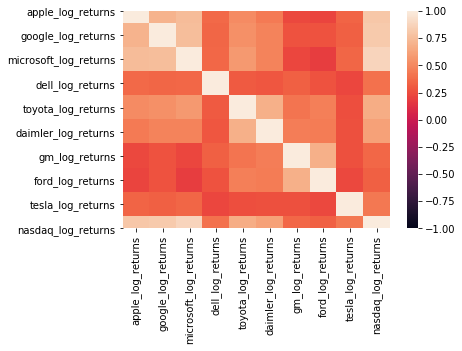

In [324]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [365]:
# Generation of two dataframes. Tesla and tech sector, Tesla and auto sector, for multiple linear regression

tesla_tech_df = log_returns_df[['tesla_log_returns','apple_log_returns','google_log_returns','microsoft_log_returns','dell_log_returns']]
tesla_auto_df = log_returns_df[['tesla_log_returns','toyota_log_returns','daimler_log_returns','gm_log_returns','ford_log_returns']]

In [366]:
def multiple_linear_model(dataframe,y):
    multiple_model = LinearRegression()
    x= dataframe.drop(y, axis=1)
    y = dataframe[y]
    multiple_model.fit(x, y)
    predicted_y_values = multiple_model.predict(x)
    predicted_y_values
    r2 = multiple_model.score(x, y, sample_weight=None)
    return r2

In [367]:
tesla_tech_r2 = multiple_linear_model(tesla_tech_df,'tesla_log_returns')
tesla_auto_r2 = multiple_linear_model(tesla_auto_df,'tesla_log_returns')

In [368]:
tesla_tech_r2

0.15191452952907014

In [371]:
tesla_auto_r2

0.1063105753477982